In [1]:
import graphgen
from graphgen import data
from graphgen.graph import Graph, Node
from graphgen.generate import convert_to_graph
import matplotlib.pyplot as plt
from fastdtw import fastdtw
import numpy as np
from scipy.spatial.distance import euclidean

In [2]:
# Get data
path = "/Users/bkalisetti658/desktop/graphgen/data/InteractionDR1.0/recorded_trackfiles/DR_USA_Roundabout_EP"
box = [[960, 1015], [980, 1040]]
traces = data.get_training_data(1, path, box)
traces = data.clean(traces, 50, 1)

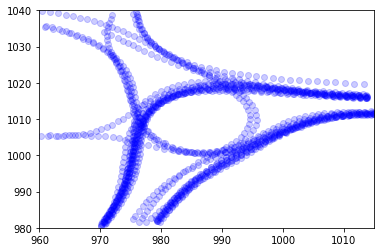

In [3]:
# Plot initial data
plt.figure(0)
plt.xlim(960, 1015)
plt.ylim(980, 1040)
for trace in traces:
    for point in trace:
        plt.scatter(point[0], point[1], c='b', alpha=0.2)
plt.show()

In [4]:
# Get nodes
trips = []
for trace in traces:
    trip = []
    for point in trace:
        trip.append(Node(point[0], point[1], point[2]))
    trips.append(trip)

In [1]:
# Classify traces into lanes manually
rl = [16]
rb = [0, 1, 8, 11, 14, 15, 18, 19, 21, 24]
br = [6, 12, 13, 20, 22, 25, 26, 27]
tr = [2, 7, 10]
rt = [3]
special = [4]
bt = [9, 23]


In [13]:
# Calculate average dtw distance in rb
avg_distance = 0
count = 0
for i in rb:
    for j in rb:
        if i != j:
            x = np.array(traces[i])
            y = np.array(traces[j])
            x = x[:, :2]
            y = y[:, :2]
            distance, _ = fastdtw(x, y, dist=euclidean)
            avg_distance += distance
            count += 1
avg_distance = avg_distance/count
print(avg_distance)

251.14515501452144
231.7900291702138
223.4628619688299
216.00881096151886
213.83132354898686
233.33031101354774
214.4035803909773
243.22139816374425
237.3225175552261
251.14515501452144
55.52454341243118
62.07015355536718
68.14147154483398
68.09242975457097
76.3966182496142
78.27840047094318
59.8891023534206
79.2676512380482
231.7900291702138
55.52454341243118
47.6739765249947
61.22121060537229
61.19357845940871
70.45998652321573
65.15238535649766
61.17561686118997
70.07648219225068
223.4628619688299
62.07015355536718
47.6739765249947
27.551757196079045
29.022287268812896
33.32541573578012
29.289583036473367
43.996430718857475
51.542991101758105
216.00881096151886
68.14147154483398
61.22121060537229
27.551757196079045
24.667760561808784
31.0078756156984
32.16296501779106
38.90756734206346
43.24400385749504
213.83132354898686
68.09242975457097
61.19357845940871
29.022287268812896
24.667760561808784
31.514775741965696
25.967392479944678
39.567986419727056
50.65246051764147
233.3303110135

In [7]:
# Calculate average distance from rb to rl
# Same starting point but different ending points
avg_distance = 0
count = 0
x = np.array(traces[rl[0]])
x = x[:, :2]
for i in rb:
    y = np.array(traces[i])
    y = y[:, :2]
    distance, _ = fastdtw(x, y, dist=euclidean)
    avg_distance += distance
    count += 1
avg_distance /= count
print(avg_distance)


394.8680010716416


In [10]:
# Calculate average distance from special to rt
# Very similar paths, but slightly different start points
x = np.array(traces[rt[0]])
y = np.array(traces[specia[0]])
x = x[:, :2]
y = y[:, :2]
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

54.50583865777046


In [28]:
groups = [] # Keep track of indices
graphs = [] # Keep track of lane graphs

# Get rid of odd traces

# Iterate through all traces
for i in range(len(traces)):
    trip = [Node(point[0], point[1], point[2]) for point in traces[i]]
    # Base case 
    if len(groups) == 0:
        groups.append([i])
        G = convert_to_graph([trip])
        graphs.append(G)
    else:
        new = True
        # Search all graphs, do dtw on graph and trace
        for j in range(len(graphs)):
            graph = graphs[j]
            lane_points = graph.get_lane_points()
            x = np.array(traces[i])
            x = x[:, :2]
            y = np.array(lane_points)
            distance, time = fastdtw(x, y, dist=euclidean)
            # If distance is below threshold, we can skip this trace
            if distance < 300:
                new = False
                groups[j].append(i)
                break
        # Make a new lane if necessary
        if new:
            groups.append([i])
            G = convert_to_graph([trip])
            graphs.append(G)

[0, 1, 7, 10, 13, 14, 17, 18, 20, 23]
[2, 6, 9, 27]
[3, 4, 16]
[5, 11, 12, 19, 21, 24, 25, 26]
[8, 22]
[15]


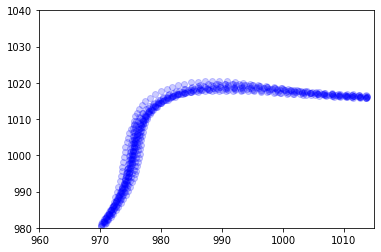

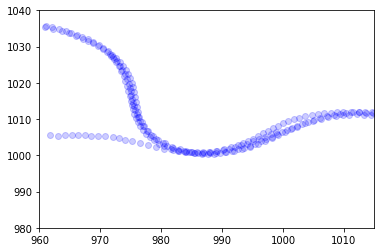

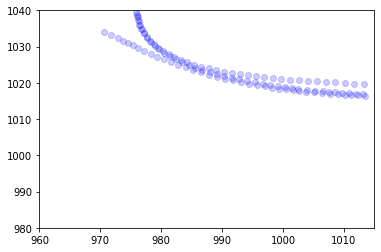

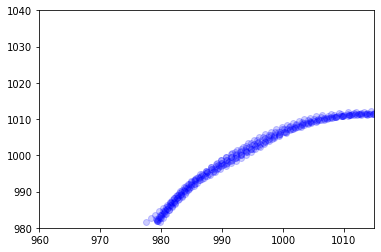

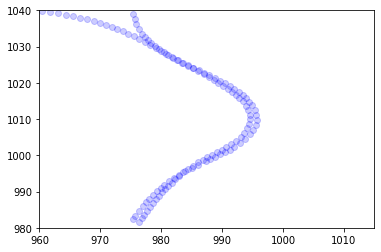

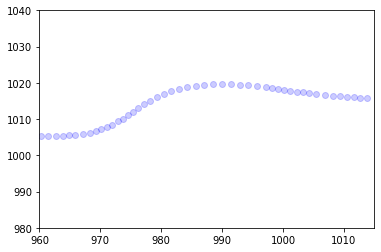

In [29]:
# Plot the groups of traces
for i in range(len(groups)):
    plt.figure(i)
    plt.xlim(960, 1015)
    plt.ylim(980, 1040)
    for index in groups[i]:
        for point in traces[index]:
            plt.scatter(point[0], point[1], c='b', alpha=0.2)
    print(groups[i])

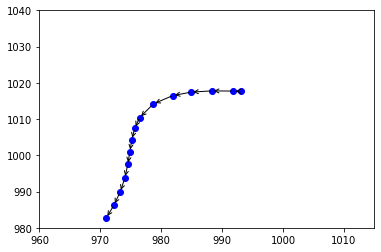

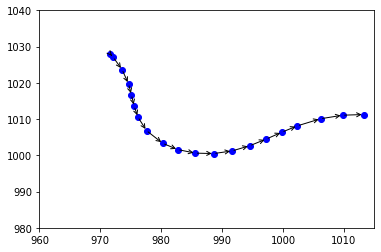

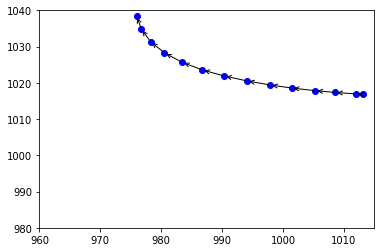

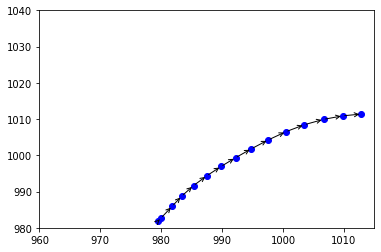

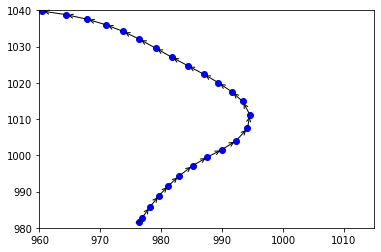

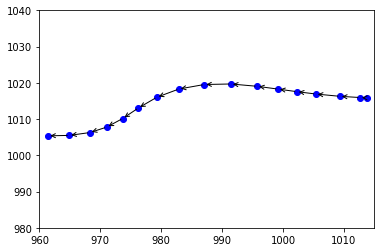

In [23]:
# Plot the graphs
for i in range(len(graphs)):
    plt.figure(i)
    plt.xlim(960, 1015)
    plt.ylim(980, 1040)
    graphs[i].draw()